# Project: Wrangling and Analyze Data

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
import pandas as pd 
import requests
import os
from bs4 import BeautifulSoup
import glob
import json
import matplotlib.pyplot as plt


archive= pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
image = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')
folder_name = 'image'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open(os.path.join(folder_name, url.split('/')[-1]),mode = 'wb') as file:
    file.write(response.content)
os.listdir(folder_name)
image = pd.read_csv('image-predictions.tsv',sep='\t')


3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
df_list = []
with open ('tweet-json.txt','r') as file:
    for line in file:
        data = json.loads(line)
        tweet_id = data['id']
        retweet_count=data['retweet_count']
        favorite_count=data['favorite_count']
        df_list.append({'tweet_id':tweet_id,
                        'retweet_count':retweet_count,
                        'favorite_count':favorite_count})
tweet_data = pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count'])


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



In [5]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [6]:
image.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [7]:
archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2037,671561002136281088,NaN,NaN,2015-12-01 05:26:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is the best thing I've ever seen so sprea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671561002...,13,10,the,None,None,None,None
2014,672222792075620352,NaN,NaN,2015-12-03 01:16:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cal. He's a Swedish Geriatric Cheddar....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672222792...,9,10,Cal,None,None,None,None
13,889638837579907072,NaN,NaN,2017-07-25 00:10:02 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ted. He does his best. Sometimes that'...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889638837...,12,10,Ted,None,None,None,None
188,855862651834028034,8.558616e+17,194351775.0,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
54,881666595344535552,NaN,NaN,2017-07-03 00:11:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gary. He couldn't miss this puppertuni...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881666595...,13,10,Gary,None,None,None,None


In [8]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [9]:
archive.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [10]:
archive.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
5           None
6            Jax
7           None
8           Zoey
9         Cassie
10          Koda
11         Bruno
12          None
13           Ted
14        Stuart
15        Oliver
16           Jim
17          Zeke
18       Ralphus
19        Canela
20        Gerald
21       Jeffrey
22          such
23        Canela
24          None
25          None
26          Maya
27        Mingus
28         Derek
29        Roscoe
          ...   
2326       quite
2327           a
2328        None
2329        None
2330        None
2331        None
2332        None
2333          an
2334           a
2335          an
2336        None
2337        None
2338        None
2339        None
2340        None
2341        None
2342        None
2343        None
2344        None
2345         the
2346         the
2347           a
2348           a
2349          an
2350           a
2351        None
2352           a
2353          

In [11]:
archive.name.value_counts()

None         745
a             55
Charlie       12
Cooper        11
Lucy          11
Oliver        11
Tucker        10
Penny         10
Lola          10
Bo             9
Winston        9
the            8
Sadie          8
Buddy          7
an             7
Bailey         7
Toby           7
Daisy          7
Jax            6
Jack           6
Bella          6
Dave           6
Leo            6
Milo           6
Scout          6
Stanley        6
Rusty          6
Oscar          6
Koda           6
Finn           5
            ... 
Hubertson      1
Ivar           1
Erik           1
Kenzie         1
Trigger        1
Jim            1
Ember          1
Jeremy         1
Marvin         1
Bluebert       1
Andy           1
Lenox          1
Sobe           1
Jameson        1
Fido           1
Loomis         1
Bobb           1
Bobble         1
life           1
Ron            1
Noosh          1
Skye           1
Acro           1
Stella         1
Kota           1
Sid            1
Remus          1
Dietrich      

In [12]:
tweet_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
dtypes: int64(3)
memory usage: 55.2 KB


### Quality issues
1. the columns name in the image table

2. the dog mya is miss spilled

3. ratig denominator that are not equal to ten

4. rating numerator that are less than ten 

5. the null vales 

6. timestamp of wrong data type

7. the dog names with the lower case

8. dog names that are (a,an,the,none)





### Tidiness issues
1. the three seperate columns

2. columns that i don't need

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [13]:
# Make copies of original pieces of data
archive_copy = archive.copy()
image_copy= image.copy()
tweet_copy = tweet_data.copy()

### Issue #1:

#### Define:

1. drop the unneeded columns for my analysis from the archive table using the drop function 

2. merge the coulmn together 

#### Code

In [14]:
not_needed = archive_copy['retweeted_status_id'].value_counts()
unique_retweeted_ids = not_needed[not_needed == 1].index
archive_copy = archive_copy[~archive_copy['retweeted_status_id'].isin(unique_retweeted_ids)]

In [15]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
doggo                         2175 non-null object
floofer                       2175 non-null object
pupper                        2175 non-null object
puppo                         2175 non-null object
dtypes: float64(4), int64(3), object(1

In [16]:

columns_not_needed = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','text']
archive_copy.drop(columns_not_needed,axis=1,inplace=True)

#### Test

In [17]:
archive_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 11 columns):
tweet_id              2175 non-null int64
timestamp             2175 non-null object
source                2175 non-null object
expanded_urls         2117 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dtypes: int64(3), object(8)
memory usage: 203.9+ KB


In [18]:
archive_tweet_1 = pd.merge(archive_copy,tweet_copy,on='tweet_id',how='left')
final_table = pd.merge(archive_tweet_1,image_copy,on='tweet_id',how='inner')

In [19]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null boo

### Issue #2:

#### Define
1. correct the mya dog name and convert it to maya
2. remove the null values
3. remove the dof names that begin with (a,an,the,None)
4. capitalize the first litter of the dogs name
5. make all the rating ddemonater is equal to 10 
6. remove the numorator that are less than 10 
7. change the data type of tymestamp to a date time data type 
8. fix the columns name

#### Code

In [20]:
final_table.name = final_table.name.replace('mya','Maya')

#### Test

In [21]:
final_table[final_table.name=='Maya']

,tweet_id,timestamp,source,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
25,886983233522544640,2017-07-17 16:17:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",https://twitter.com/dog_rates/status/886983233...,13,10,Maya,None,None,None,...,2,Chihuahua,0.793469,True,toy_terrier,0.143528,True,can_opener,0.032253,False


In [22]:
final_table= final_table.dropna()

In [23]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 24 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
doggo                 1994 non-null object
floofer               1994 non-null object
pupper                1994 non-null object
puppo                 1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
jpg_url               1994 non-null object
img_num               1994 non-null int64
p1                    1994 non-null object
p1_conf               1994 non-null float64
p1_dog                1994 non-null bool
p2                    1994 non-null object
p2_conf               1994 non-null float64
p2_dog                1994 non-null boo

In [24]:
final_table = final_table[~final_table['name'].isin(['a', 'the','an','None'])]

In [25]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1380 entries, 0 to 1964
Data columns (total 24 columns):
tweet_id              1380 non-null int64
timestamp             1380 non-null object
source                1380 non-null object
expanded_urls         1380 non-null object
rating_numerator      1380 non-null int64
rating_denominator    1380 non-null int64
name                  1380 non-null object
doggo                 1380 non-null object
floofer               1380 non-null object
pupper                1380 non-null object
puppo                 1380 non-null object
retweet_count         1380 non-null int64
favorite_count        1380 non-null int64
jpg_url               1380 non-null object
img_num               1380 non-null int64
p1                    1380 non-null object
p1_conf               1380 non-null float64
p1_dog                1380 non-null bool
p2                    1380 non-null object
p2_conf               1380 non-null float64
p2_dog                1380 non-null boo

In [26]:
final_table['name'] = final_table['name'].astype(str).str.capitalize()

In [27]:
final_table['name']

0          Phineas
1            Tilly
2           Archie
3            Darla
4         Franklin
6              Jax
8             Zoey
9           Cassie
10            Koda
11           Bruno
13             Ted
14          Stuart
15          Oliver
16             Jim
17            Zeke
18         Ralphus
19          Gerald
20         Jeffrey
21            Such
22          Canela
25            Maya
26          Mingus
27           Derek
28          Roscoe
29         Waffles
30           Jimbo
31          Maisey
33            Earl
34            Lola
35           Kevin
           ...    
1909          Hall
1910      Philippe
1913         Reese
1914       Cupcake
1918         Biden
1919          Fwed
1921     Genevieve
1922        Joshwa
1925       Timison
1928      Clarence
1929       Kenneth
1930       Churlie
1931       Bradlay
1932         Pipsy
1934          Gabe
1935         Clybe
1936          Dave
1938          Keet
1940        Klevin
1941         Carll
1946          Jeph
1947       J

In [38]:
final_table['rating_denominator'] =10

In [39]:
final_table.rating_denominator.value_counts()

10    1123
Name: rating_denominator, dtype: int64

In [40]:
final_table = final_table[final_table['rating_numerator']>=10]

In [41]:
final_table['rating_numerator'].value_counts()

12      334
11      306
10      279
13      178
14       20
1776      1
204       1
75        1
50        1
27        1
24        1
Name: rating_numerator, dtype: int64

In [42]:
final_table['timestamp'] = pd.to_datetime(final_table['timestamp'])

In [43]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123 entries, 0 to 1963
Data columns (total 24 columns):
tweet_id                          1123 non-null int64
timestamp                         1123 non-null datetime64[ns]
source                            1123 non-null object
expanded_urls                     1123 non-null object
rating_numerator                  1123 non-null int64
rating_denominator                1123 non-null int64
name                              1123 non-null object
doggo                             1123 non-null object
floofer                           1123 non-null object
pupper                            1123 non-null object
puppo                             1123 non-null object
retweet_count                     1123 non-null int64
favorite_count                    1123 non-null int64
jpg_url                           1123 non-null object
img_num                           1123 non-null int64
primary_prediction                1123 non-null object
primary_pre

In [44]:
final_table.rename(columns={'p1':'primary_prediction',
                          'p2':'secondary_prediction',
                          'p3':'tertiary_prediction',
                          'p1_conf':'primary_prediction_confident',
                          'p2_conf':'secondary_prediction_confident',
                          'p3_conf':'tertiary_prediction_confident',
                          'p1_dog':'primary_prediction_result',
                          'p2_dog':'secondary_prediction_result',
                          'p3_dog':'tertiary_prediction_result'},inplace= True)

In [45]:
final_table.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123 entries, 0 to 1963
Data columns (total 24 columns):
tweet_id                          1123 non-null int64
timestamp                         1123 non-null datetime64[ns]
source                            1123 non-null object
expanded_urls                     1123 non-null object
rating_numerator                  1123 non-null int64
rating_denominator                1123 non-null int64
name                              1123 non-null object
doggo                             1123 non-null object
floofer                           1123 non-null object
pupper                            1123 non-null object
puppo                             1123 non-null object
retweet_count                     1123 non-null int64
favorite_count                    1123 non-null int64
jpg_url                           1123 non-null object
img_num                           1123 non-null int64
primary_prediction                1123 non-null object
primary_pre

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [46]:
final_table.to_csv('twitter_archive_master.csv',index = False)
df = pd.read_csv('twitter_archive_master.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1123 entries, 0 to 1122
Data columns (total 24 columns):
tweet_id                          1123 non-null int64
timestamp                         1123 non-null object
source                            1123 non-null object
expanded_urls                     1123 non-null object
rating_numerator                  1123 non-null int64
rating_denominator                1123 non-null int64
name                              1123 non-null object
doggo                             1123 non-null object
floofer                           1123 non-null object
pupper                            1123 non-null object
puppo                             1123 non-null object
retweet_count                     1123 non-null int64
favorite_count                    1123 non-null int64
jpg_url                           1123 non-null object
img_num                           1123 non-null int64
primary_prediction                1123 non-null object
primary_prediction_

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

(array([ 932.,    0.,    0.,  130.,    0.,    0.,   37.,    0.,    0.,   24.]),
 array([ 1. ,  1.3,  1.6,  1.9,  2.2,  2.5,  2.8,  3.1,  3.4,  3.7,  4. ]),
 <a list of 10 Patch objects>)

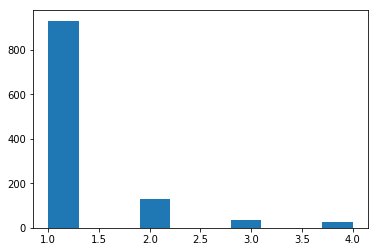

In [48]:
plt.hist(df['img_num'])

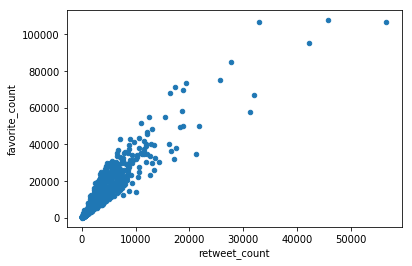

In [49]:
df.plot(kind ='scatter',x='retweet_count',y='favorite_count')

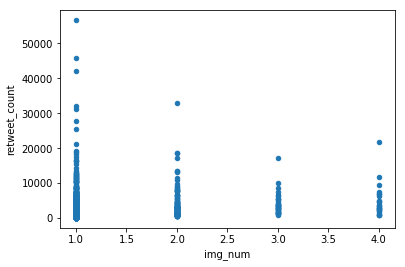

In [50]:
df.plot(kind ='scatter',x='img_num',y='retweet_count')

### Insights:
1. the number of images that was posted was only one image

2. the is a positive and a reltively strong assossiation between the number of retweet and the favorite count

3. from the second scatter i draw i dont see a significant association between the numbe

### Visualization